A notebook to fit 10 000 simulated SDSS and OGLE light curves, representing Kozlowski's Fig.2. We already have fits using Celerite - check how Chelsea's method fares. 

In [104]:
import os 
import subprocess
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18


Since there was an issue with t_SDSS, t_OGLE (there were repeated observation times),  I redid the light curves, saving them in `Paper2_SDSS_PTF_PS1/data_products/Simulated_DRW_Kozlowski/SDSS/180713_light_curves_NEW`
`Paper2_SDSS_PTF_PS1/data_products/Simulated_DRW_Kozlowski/OGLE/180713_light_curves_NEW`

Here I read each light curve, add noise,  and store in the format digestible 
by the Fortran code. 

In [172]:
# First ,need to prepare light curves so that 
# they are in the format required by Chelsea's Fortran code 
simulation = 'OGLE'

increase_err = True 
if simulation is 'SDSS' : 
    r = 17 # mag 
    variance = 0.013**2.0 + np.exp(2 * (r-23.36))
    t = np.loadtxt('/Users/chris/GradResearch/Paper2_SDSS_PTF_PS1/code/t_SDSS_NEW.txt')

if simulation is 'OGLE':
    N = 445 
    I = 18 # mag 
    variance = 0.004**2.0 + np.exp(1.63 * (I - 22.55))    
    t =  np.loadtxt('/Users/chris/GradResearch/Paper2_SDSS_PTF_PS1/code/t_OGLE_NEW.txt')

    
print(simulation,' noise stdev ', np.sqrt(variance))

# set the light curve directory : only magnitudes are stored, 
#i.e. one column .... 
lcDir = '/Users/chris/GradResearch/Paper2_SDSS_PTF_PS1'+\
         '/data_products/Simulated_DRW_Kozlowski/'+\
         simulation+'/180713_light_curves_NEW/'
        
# set the output directory : make it here ,
# because it seems that the fortran code 
# cannot digest very long strings as filename  :
# it is defined as 100 character string after all ! 
# --> see line 7 of qso.f  

resDir  = '/Users/chris/GradResearch/Fortran_Chelsea/code/'+\
         'fit_simulated_qso/Fig2_Kozlowski_'+simulation+'/err2/lc/'
    
# /err1/ : standard variance 
# /err2/ : 100 times larger variance, and correspondingly noise and 
#        10 times larger error (stdev)
# loop over all light curves, 
# reading the y-values from where they were stored
# adding the same noise as earlier, and
# combining with the time column
for i in range(100):  #100
    print(i)
    for j in range(100):  # 100
        fname = 'DRW_rho-' + str(i).zfill(3)+'_'+str(j).zfill(3)+'.txt'
        # load the ideal lc , made with mod.sim_DRW_lightcurve()
        y = np.loadtxt(lcDir+fname)
        # add noise 
        
        noise = np.random.normal(loc=0,scale=np.sqrt(variance),size=len(t))
        y += noise # eq.2 Kozlowski+2017
        yerr = np.ones_like(t)* np.sqrt(variance)
        # make error column
        if increase_err : 
            yerr *= 10 

        # store everything  as time, magnitude, error 
        X = np.column_stack([t,y,yerr])
        fname = resDir + 'DRW_rho-' + str(i).zfill(3)+'_'+str(j).zfill(3) + 'F.txt'
        np.savetxt(fname, X, fmt=' %10.6f  %10.10f  %10.10f'  )

OGLE  noise stdev  0.0248445133097
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [140]:
yerr

array([ 0.01311452,  0.01311452,  0.01311452,  0.01311452,  0.01311452,
        0.01311452,  0.01311452,  0.01311452,  0.01311452,  0.01311452,
        0.01311452,  0.01311452,  0.01311452,  0.01311452,  0.01311452,
        0.01311452,  0.01311452,  0.01311452,  0.01311452,  0.01311452,
        0.01311452,  0.01311452,  0.01311452,  0.01311452,  0.01311452,
        0.01311452,  0.01311452,  0.01311452,  0.01311452,  0.01311452,
        0.01311452,  0.01311452,  0.01311452,  0.01311452,  0.01311452,
        0.01311452,  0.01311452,  0.01311452,  0.01311452,  0.01311452,
        0.01311452,  0.01311452,  0.01311452,  0.01311452,  0.01311452,
        0.01311452,  0.01311452,  0.01311452,  0.01311452,  0.01311452,
        0.01311452,  0.01311452,  0.01311452,  0.01311452,  0.01311452,
        0.01311452,  0.01311452,  0.01311452,  0.01311452,  0.01311452])

In [141]:
variance2  = 100 * variance

In [142]:
yerr = np.ones_like(t)* np.sqrt(variance2)

In [173]:
simulation = 'OGLE'
# set the output directory 
simDir  = 'Fig2_Kozlowski_'+simulation+'/'
lcDir  = simDir +'/err2/lc/' 

lcNames=  os.listdir(lcDir)
lcNpoints = str(len(np.loadtxt(lcDir+lcNames[0])))
print(simulation, 'N points  = ', lcNpoints)

# Make a input.filter file, saying which filter we are using (1 = u,  5 = z )
f = open(simDir+"input.filter", "w+")
f.write("1")
f.close()

# Make a process.dat file ...
f= open(simDir+"process.dat","w+")

# write the header
Nlightcurves =  len(lcNames)
f.write(str(Nlightcurves)+" #ndata RA Dec redshift Absi fname \n")
# write the file lines 
for i in range(Nlightcurves):#len(lcNames)):
     f.write(lcNpoints + "   0       0       1     -25  " +   "'"+"err2/lc/"+lcNames[i]+ "'\n")
# close the file 
f.close()

OGLE N points  =  445


In [46]:
lcDir[:-3]

'Fig2_Kozlowski_OGLE/'

In [ ]:
# run the compiled Fortran program 
bashCommand = "./qso.out"
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output, error = process.communicate()

Read in the results of both simulations ,  and plot Fig2 

In [90]:
np.asarray(files)

array(['Fig2_Kozlowski_SDSS/lc/DRW_rho-068_080F.txt',
       'Fig2_Kozlowski_SDSS/lc/DRW_rho-008_023F.txt',
       'Fig2_Kozlowski_SDSS/lc/DRW_rho-015_059F.txt', ...,
       'Fig2_Kozlowski_SDSS/lc/DRW_rho-041_088F.txt',
       'Fig2_Kozlowski_SDSS/lc/DRW_rho-018_082F.txt',
       'Fig2_Kozlowski_SDSS/lc/DRW_rho-099_097F.txt'],
      dtype='<U43')

In [179]:
simulation = 'SDSS'
# set the output directory 
error = 'err2'
simDir  = 'Fig2_Kozlowski_'+simulation+'/'+error+'/'

# NOTE : log here is the log_10 !   
fit_results = Table.read(simDir+'fort.40', format='ascii', 
                         names=['edge','mu', 'maxlike','minchi','minchired', 'log_sigma' ,
 'log_sig_err_lo','log_sig_err_hi','log_tau','log_tau_err_lo','log_tau_err_hi',
 'log_tau_med','log_sig_med', 'fname']  )

fit_stats = Table.read(simDir+'fort.39', format='ascii', 
                    names=['index', 'redshift', 'distance_modulus',
                          'M_i', 'mean_mag', 'chi2const', 'chi2linear',
                        'Pnoise', 'Pinf', 'Plike', 'chi2noise',
                          'chi2inf', 'chi2pr', 'logSigNoise',
                          'logSigInf', 'npts', 'fname'])


rho_min, rho_max,  n_rho = 0.001, 15, 100
rho_grid = np.logspace(np.log10(rho_min), np.log10(rho_max), n_rho)

lcDir  = simDir +'lc/' 
files = np.asarray(fit_results['fname'])
fortran_results = {'lc_name': np.zeros_like(files),
                  'sigma_fit':np.zeros(len(files), dtype=float),
                  'tau_fit':np.zeros(len(files), dtype=float),
                   'rho_in':np.zeros(len(files), dtype=float),
                   'tau_in':np.zeros(len(files), dtype=float),
                   'rho_out':np.zeros(len(files), dtype=float),
                  }
print('Using ', len(files), ' files')
t_exp = 8 * 365.0

for k in range(len(files)):

    fname = fit_results['fname'][k][-20:]
    
    i = int(fname[8:11])
    j = int(fname[12:15])
    rho_input = rho_grid[i]
    tau_input = rho_input * t_exp
    tau_fit = np.power(10,fit_results['log_tau'][k])
    #print(fname , 'i=',i,'j=',j, 'rho_in=',rho_input, 'tau_in=',tau_input,
    #      'tau_fit=', tau_fit )
    
    fortran_results['lc_name'][k] = fname
    fortran_results['sigma_fit'][k] = np.power(10,fit_results['log_sigma'][k])
    fortran_results['tau_fit'][k] = tau_fit
    fortran_results['rho_in'][k] = rho_input
    fortran_results['tau_in'][k] = tau_input
    fortran_results['rho_out'][k] = tau_fit / t_exp 
print('Done')


# store the results as a table ... 
fortran_table = Table(fortran_results)
fname  = 'fortran_'+simulation+'_'+error+'_results.txt'
print('Saved as ', fname)
fortran_table.write(fname, format='ascii',overwrite=True)

 

Using  10000  files
Done
Saved as  fortran_SDSS_err2_results.txt


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10


Saved as  fortran_SDSS_err2.png


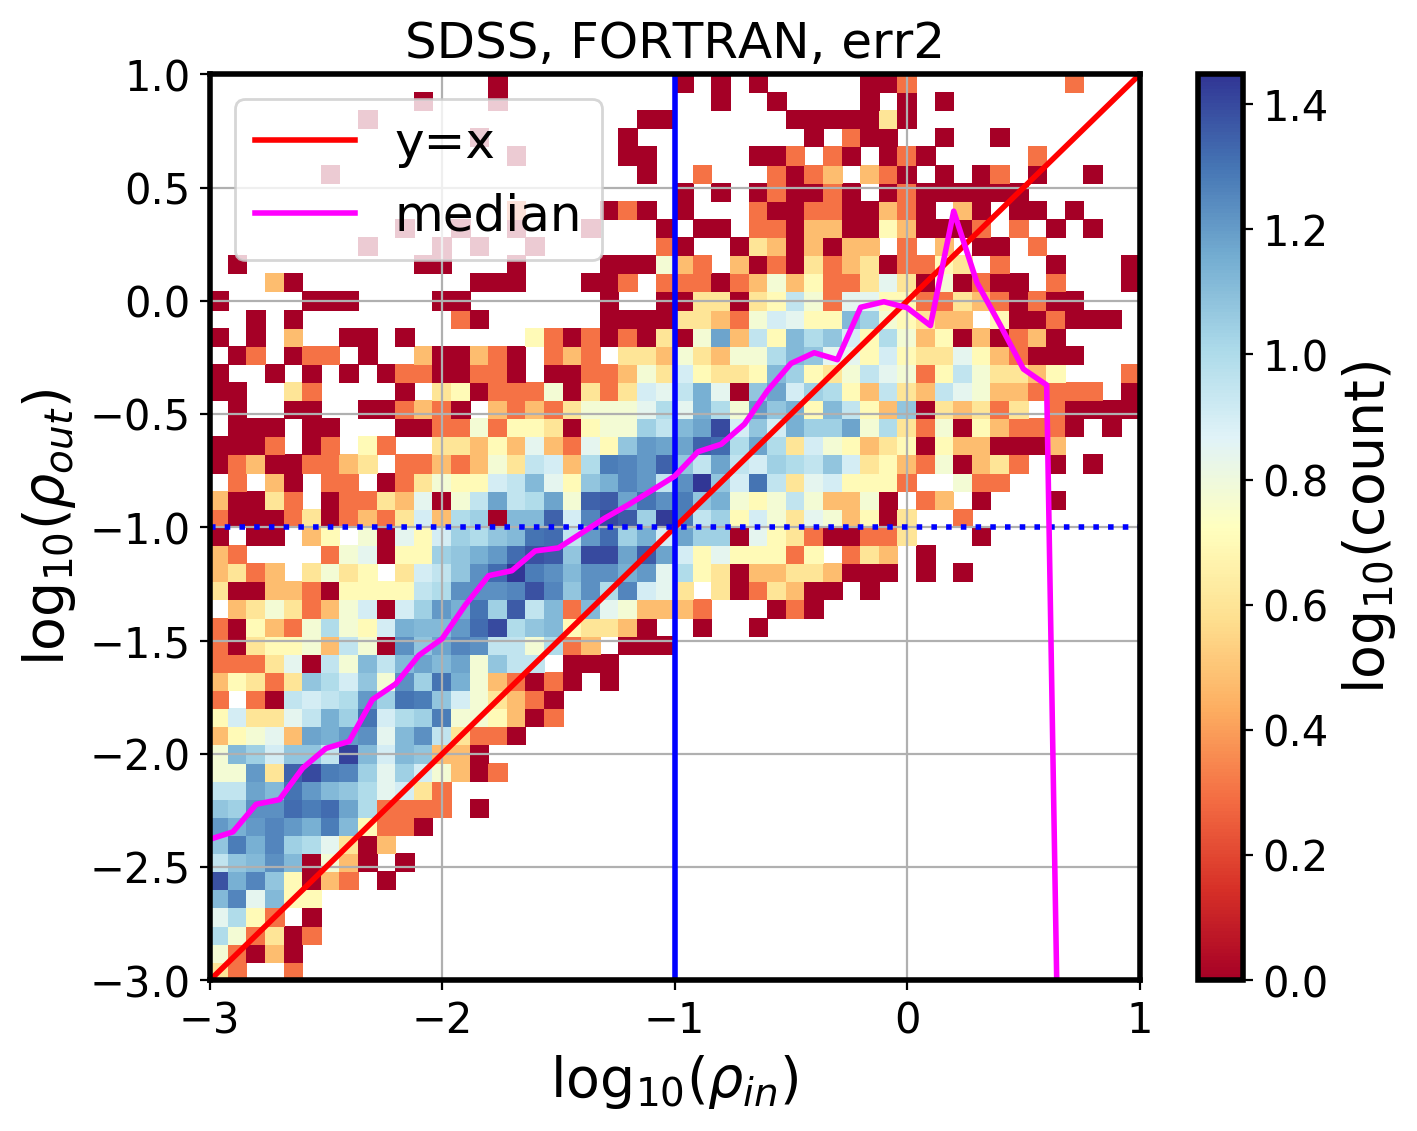

In [184]:
%matplotlib inline
from scipy.stats import binned_statistic_2d

simulation='SDSS' # 'OGLE'#'SDSS'
error = 'err2'
fname  = 'fortran_'+simulation+'_'+error+'_results.txt'
results = Table.read(fname, format='ascii')

%config InlineBackend.figure_format='retina'
#fig = plt.figure(figsize=(10, 5), dpi=100)

t_exp = 8 * 365.0 # days 
rho_in = results['rho_in']
rho_out  = results['rho_out'] 

fig,ax = plt.subplots(1,1,figsize=(7.5,6), dpi=100)
xmin,xmax = -3,1
ymin,ymax  = -3,1
x = np.log10(rho_in)
y = np.log10(rho_out)


stats = binned_statistic_2d(x, y, x, statistic='count', bins=50,
                           range = [[xmin, xmax], [ymin, ymax]])
z_sigma, x_edges, y_edges = stats[0], stats[1], stats[2]
z_sigma[np.isnan(z_sigma)] =0 # replace all nan's by 0 ...
z_reduce  =  z_sigma
z_min, z_max = z_reduce.min(), np.abs(z_reduce).max()
z_rot = np.rot90(z_reduce)  # rotate and flip to properly display... 
z_rot_flip = np.flipud(z_rot)
z_masked = np.ma.masked_where(z_rot_flip == 0 , z_rot_flip)
image = ax.pcolormesh(x_edges,y_edges, np.log10(z_masked), 
                         cmap=plt.cm.get_cmap('RdYlBu'))
# labels...
ax.set_xlabel(r'$\log_{10}(\rho_{in})$')
ax.set_ylabel(r'$\log_{10}(\rho_{out})$')

plt.colorbar(image, label=r'$\log_{10}{(\mathrm{count})}$')
# lines to guide the eye ...
ax.grid()
xlim = ax.get_xlim()
x_line = np.arange(xlim[0], xlim[1],0.01)
ax.plot(x_line,x_line, ls='-', lw=2, color='red', label='y=x')
ax.axhline(-1, ls=':', lw=2, c='blue')
ax.axvline(-1, ls='-', lw=2, c='blue')

# calculate the median of log(rho_out)
# Median of the log(y) is not the log(median(y)) .... 
min_x, max_x , step_size = xlim[0],xlim[1], 0.1
mean_x = np.arange(min_x, max_x+step_size , step_size)
dx = 0.5 * step_size 
median_y = np.zeros(len(mean_x))

for j in range(len(median_y)):
    # take points that are within desired x_data limits for each bin
    # i.e. marginalize along y ( stack vertically)
    mask =  ((mean_x[j] - dx) < x)*(x<  (mean_x[j] + dx))
    median_y[j] = np.median(y[mask])

ax.plot(mean_x[:-1], median_y[:-1], c = 'magenta',lw=2, label='median')#, s=50 , edgecolor='black')
ax.legend(fontsize=18)
ax.set_title(simulation+', '+'FORTRAN, '+error)
ax.set_ylim(-3,1)
ax.set_xlim(-3,1)
figname = 'fortran_'+simulation+'_'+error+'.png'
plt.savefig(figname, bbox_inches='tight')
print('Saved as ', figname)

In [108]:
binned_statistic_2d??